#**Python_Jupiter_Discrete_Cosine_Transform_Sparse_Representation**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.


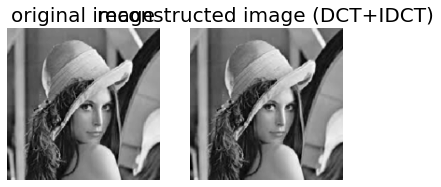

In [ ]:
from scipy.fftpack import dct, idct

# implement 2D DCT
def dct2(a):
    return dct(dct(a.T, norm='ortho').T, norm='ortho')

# implement 2D IDCT
def idct2(a):
    return idct(idct(a.T, norm='ortho').T, norm='ortho')

from skimage.io import imread
from skimage.color import rgb2gray
import numpy as np
import matplotlib.pylab as plt

# read lena RGB image and convert to grayscale
im = rgb2gray(imread('lena.png'))
imF = dct2(im)
im1 = idct2(imF)

# check if the reconstructed image is nearly equal to the original image
np.allclose(im, im1)
# True

# plot original and reconstructed images with matplotlib.pylab
plt.gray()
plt.subplot(121), plt.imshow(im), plt.axis('off'), plt.title('original image', size=20)
plt.subplot(122), plt.imshow(im1), plt.axis('off'), plt.title('reconstructed image (DCT+IDCT)', size=20)
plt.show()

In [ ]:
!pip install pylbfgs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 239 kB 5.1 MB/s 


In [ ]:
from pylbfgs import owlqn

def evaluate(x, g, step):
    """An in-memory evaluation callback."""

    # we want to return two things:
    # (1) the norm squared of the residuals, sum((Ax-b).^2), and
    # (2) the gradient 2*A'(Ax-b)

    # expand x columns-first
    x2 = x.reshape((nx, ny)).T

    # Ax is just the inverse 2D dct of x2
    Ax2 = idct2(x2)

    # stack columns and extract samples
    Ax = Ax2.T.flat[ri].reshape(b.shape)

    # calculate the residual Ax-b and its 2-norm squared
    Axb = Ax - b
    fx = np.sum(np.power(Axb, 2))

    # project residual vector (k x 1) onto blank image (ny x nx)
    Axb2 = np.zeros(x2.shape)
    Axb2.T.flat[ri] = Axb # fill columns-first

    # A'(Ax-b) is just the 2D dct of Axb2
    AtAxb2 = 2 * dct2(Axb2)
    AtAxb = AtAxb2.T.reshape(x.shape) # stack columns

    # copy over the gradient vector
    np.copyto(g, AtAxb)

    return fx

# fractions of the scaled image to randomly sample at
sample_sizes = (0.1, 0.01)

# read original image
Xorig = spimg.imread('original.png')
ny,nx,nchan = Xorig.shape

# for each sample size
Z = [np.zeros(Xorig.shape, dtype='uint8') for s in sample_sizes]
masks = [np.zeros(Xorig.shape, dtype='uint8') for s in sample_sizes]
for i,s in enumerate(sample_sizes):

    # create random sampling index vector
    k = round(nx * ny * s)
    ri = np.random.choice(nx * ny, k, replace=False) # random sample of indices

    # for each color channel
    for j in range(nchan):

        # extract channel
        X = Xorig[:,:,j].squeeze()

        # create images of mask (for visualization)
        Xm = 255 * np.ones(X.shape)
        Xm.T.flat[ri] = X.T.flat[ri]
        masks[i][:,:,j] = Xm

        # take random samples of image, store them in a vector b
        b = X.T.flat[ri].astype(float)

        # perform the L1 minimization in memory
        Xat2 = owlqn(nx*ny, evaluate, None, 5)

        # transform the output back into the spatial domain
        Xat = Xat2.reshape(nx, ny).T # stack columns
        Xa = idct2(Xat)
        Z[i][:,:,j] = Xa.astype('uint8')

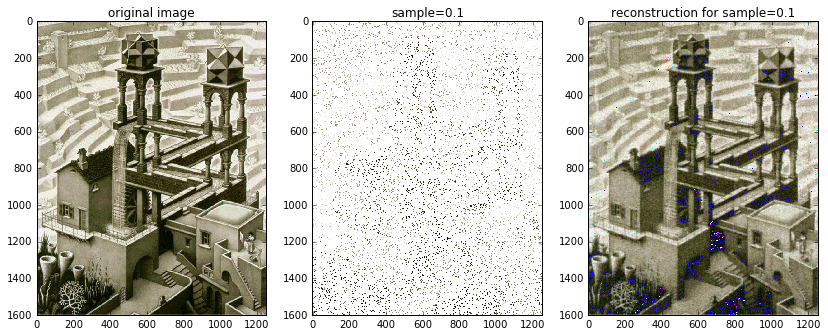

#**Sparse Representation**

In [ ]:
sparseMatrix = [[0,0,3,0,4],[0,0,5,7,0],[0,0,0,0,0],[0,2,6,0,0]]

# initialize size as 0
size = 0

for i in range(4):
    for j in range(5):
        if (sparseMatrix[i][j] != 0):
            size += 1

# number of columns in compactMatrix(size) should
# be equal to number of non-zero elements in sparseMatrix
rows, cols = (3, size)
compactMatrix = [[0 for i in range(cols)] for j in range(rows)]

k = 0
for i in range(4):
    for j in range(5):
        if (sparseMatrix[i][j] != 0):
            compactMatrix[0][k] = i
            compactMatrix[1][k] = j
            compactMatrix[2][k] = sparseMatrix[i][j]
            k += 1

for i in compactMatrix:
    print(i)

[0, 0, 1, 1, 3, 3]
[2, 4, 2, 3, 1, 2]
[3, 4, 5, 7, 2, 6]
